# ARMA 모형

ARMA(p,q) 모형은 AR(p) 모형과 MA(q) 모형의 특징을 모두 가지는 모형을 말한다. 

$$ Y_t = -\phi_1 Y_{t-1} -\phi_2 Y_{t-2} -\cdots -\phi_p Y_{t-p} + e_t + \theta_1 e_{t-1} +\theta_2 e_{t-2} \cdots  +\theta_q e_{t-q} $$

ARMA(p,q) 모형의 정상상태 조건은 AR(p)모형의 정상상태 조건과 동일하다. 즉, MA(q) 부분을 구성하는 계수 $\theta$는 정상상태 조건에 영향을 미치지 않는다.

ARMA(p,q) 모형을 일반 선형 확률 과정의 형태로 바꾸면 다음과 같아진다.

$$
Y_t = e_t + \psi_1 e_{t-1} + \psi_2 e_{t-2} + \cdots
$$

$$
\begin{eqnarray}
\psi_1 &=& \theta_1 -\phi_1 \\
\psi_2 &=& \theta_2 -phi_2 -\phi_1 \psi_1 \\
       &\vdots& \\
\psi_j &=& \theta_j -\phi_p\psi_{j-p} -\phi_2 \psi_{p-1} + \cdots  -\phi_1 \psi_{j-1} &&
\end{eqnarray}
$$

ARMA(p,q) 모형의 자기상관계수도 다음과 같이 계수 $\phi$에 대한 방정식으로 주어진다.

$$ \rho_k = -\phi_1 \rho_{k-1} - \cdots -\phi_p \rho_{k-p} $$

위 식을 사용하면 즉, Yule-Walker 연립 방정식을 사용하면 주어진 자기상관계수 함수에 대해 이를 만족하는 ARMA모형을 계산하는 것이 가능하다.

## ARMA(p,q) 모형의 시뮬레이션

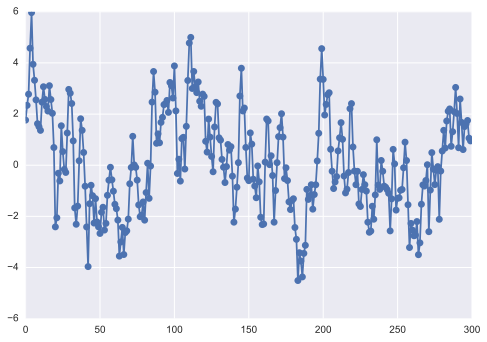

In [7]:
import statsmodels.api as sm
np.random.seed(0)
phi1 = 0.7
theta1 = -0.4
p1 = sm.tsa.ArmaProcess([1, -phi1],[1, -theta1])
y1 = p1.generate_sample(300)
plt.plot(y1, 'o-')

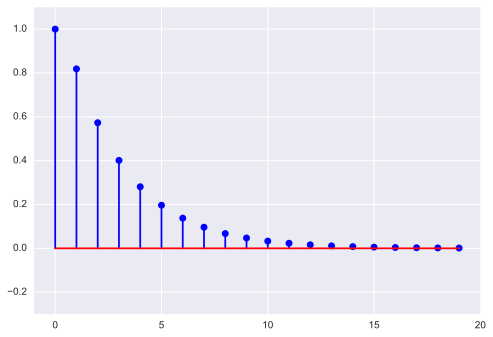

In [8]:
plt.stem(p1.acf(20))
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1);

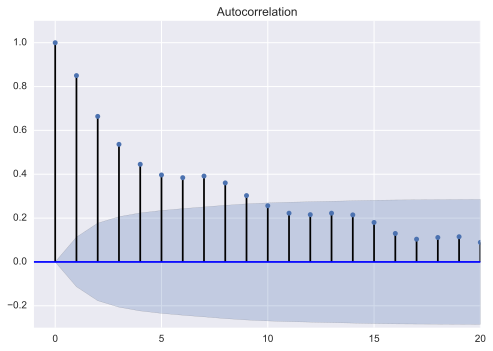

In [9]:
sm.graphics.tsa.plot_acf(y1, lags=20);
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1);

## 가역성 조건

임의의 AR(p)모형을 일반 선형 확률 과정으로 변환하였던 것 처럼 임의의 MA(p)모형도 무한 차원의 AR 모형으로 변환하는 것이 가능하다. 

MA 모형을 AR 모형으로 변환 하였을 때 이 **변환된 AR 모형이 정상상태 조건을 만족하면 원래의 MA 모형이 가역성 조건(invertibility condition)을 만족**한다고 한다.

주어진 자기상관계수 함수를 가지는 MA 모형은 복수개 있을 수 있지만 **가역성 조건을 만족하는 MA 모형은 단 하나만 존재**한다. 